In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [158]:
'''
for dataset:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("huyngohoang/housingcsv")

print("Path to dataset files:", path)



You will get path then copy and paste that path in browser then you can download dataset
'''

'\nfor dataset:\n\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("huyngohoang/housingcsv")\n\nprint("Path to dataset files:", path)\n\n\n\nYou will get path then copy and paste that path in browser then you can download dataset\n'

In [116]:
df=pd.read_csv("/content/housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [117]:
df.shape

(5000, 7)

In [118]:
df.info()   #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


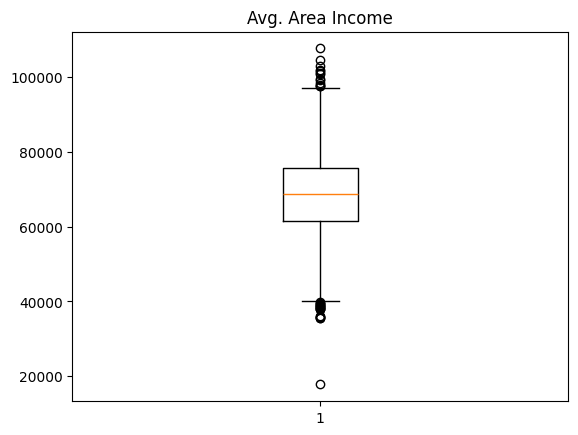

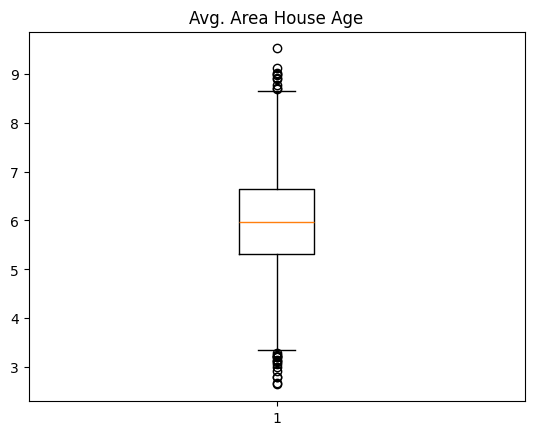

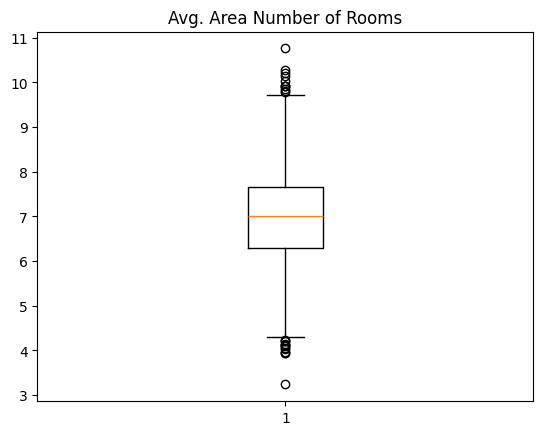

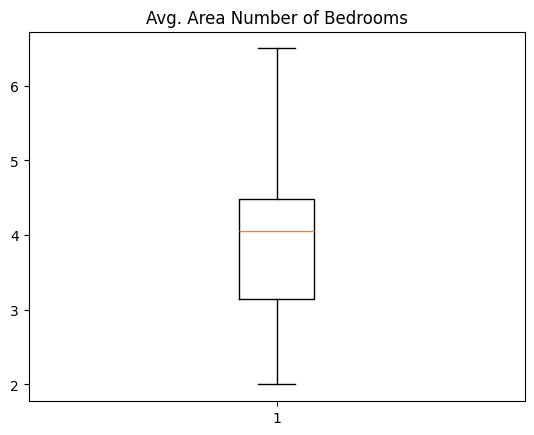

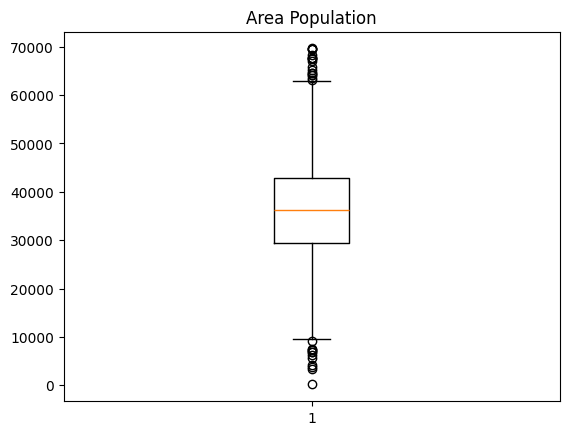

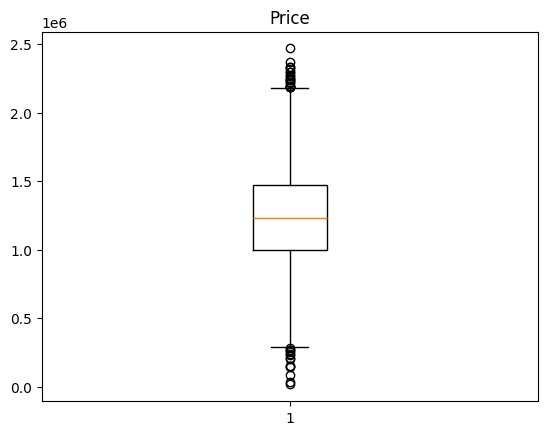

In [119]:
# check for outliers

for i in df.columns:
  if df[i].dtypes != 'object':
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [120]:
#we try to remove outliers


for i in df.columns:
  if df[i].dtypes != 'object':
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    df=df[(df[i]>=LL) & (df[i]<=UL)]

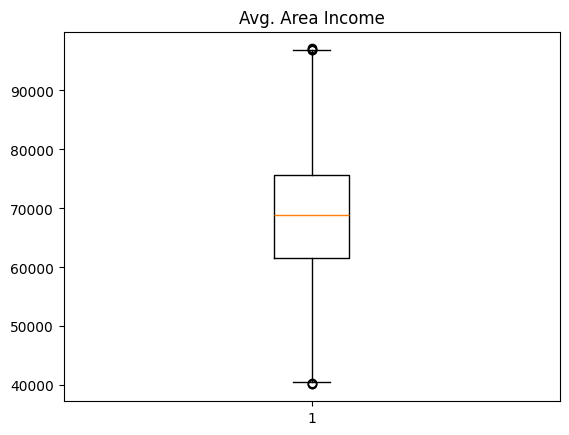

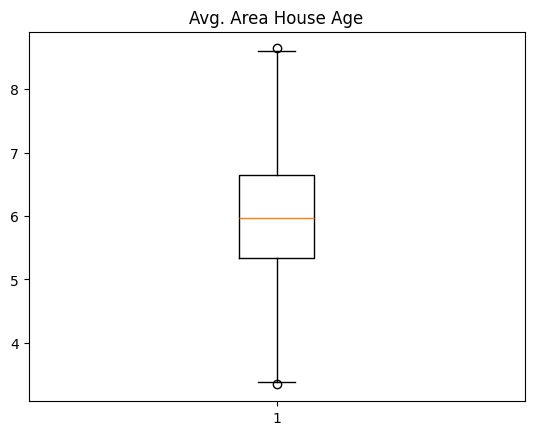

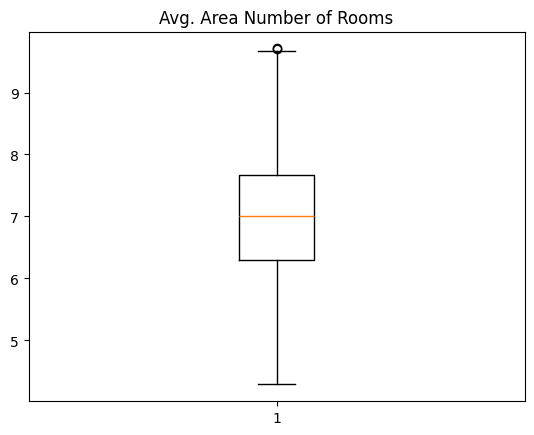

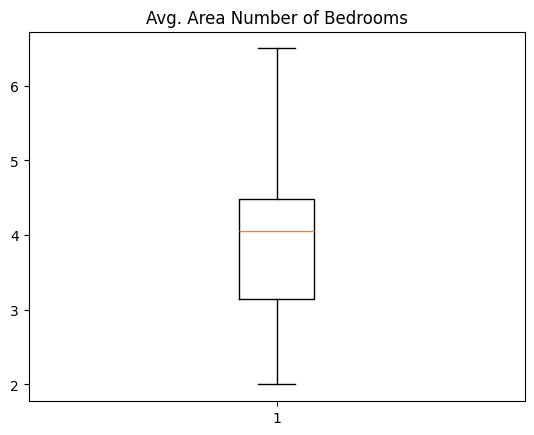

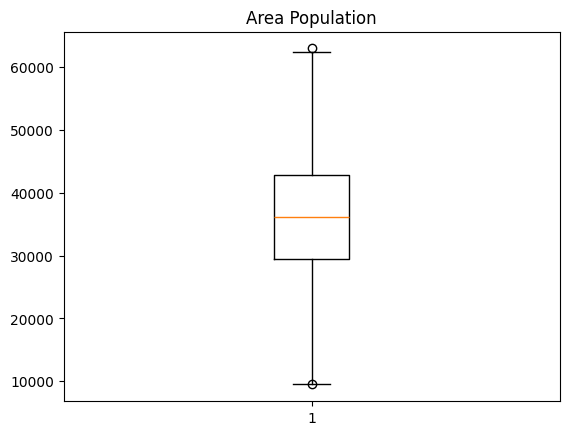

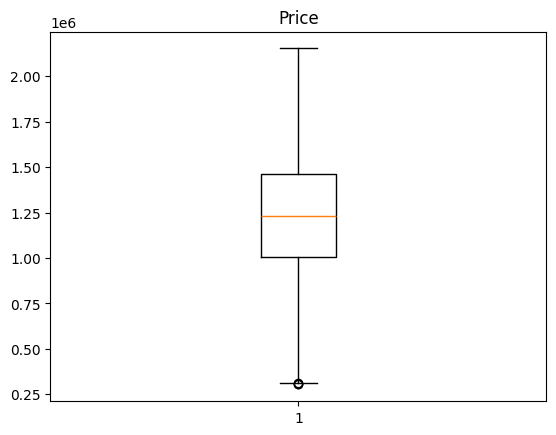

In [121]:

for i in df.columns:
  if df[i].dtypes != 'object':
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()


#Almost outliers are gone

In [122]:
df.shape

(4856, 7)

In [123]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [132]:
col_list=[]
for i in df.columns:
  if (df[i].dtypes != 'object') & (i != 'Price'):
    col_list.append(i)

In [133]:
col_list

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']

In [140]:
x=df.loc[: , ['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y=df.iloc[: ,-2]
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8, random_state=0)

In [144]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [145]:
pred=l_model.predict(x_test)
pred

array([1760373.8243388 , 1418230.57404514, 1799859.81385342,
        838948.92173773, 1490329.21237588, 1358106.86449563,
        789088.29993068, 1216363.35466661, 1013338.20883748,
        911309.54692577,  983487.29484851, 1458687.3906483 ,
       1585569.3198602 , 1428867.60369803, 1803971.72216112,
       1651996.55630765, 1089327.09473114, 1528624.42486087,
       1281028.90612328, 1317377.81623294, 1057490.69919998,
       1880231.48574873,  970298.35486188, 1443741.40817857,
       1290441.73185062, 1424966.43716239, 1089442.86747348,
       1287353.72929631, 1523732.87129258, 1834694.95668415,
        955127.67453538,  917307.38323732,  512722.39273632,
        513461.28304262, 1035358.12618348, 1458440.35208061,
       1097878.28158716,  631114.04864847, 1239221.32575606,
       1220849.88648368, 1583550.78763055,  990432.36277163,
        890132.14373248, 1130282.12429768, 1112587.41772967,
       1833744.02747689, 1410458.43262354, 1301294.90041132,
        949959.2570731 ,

In [146]:
error_pred=pd.DataFrame()
error_pred['Actual DATA']=y_test
error_pred["Predicted DATA"]=pred
error_pred['Error']=error_pred['Actual DATA'] - error_pred['Predicted DATA']
error_pred

,Actual DATA,Predicted DATA,Error
426,1.789608e+06,1.760374e+06,29233.701661
4594,1.536208e+06,1.418231e+06,117977.791955
794,1.675557e+06,1.799860e+06,-124302.542853
4848,8.666891e+05,8.389489e+05,27740.169462
1618,1.504664e+06,1.490329e+06,14335.068624
...,...,...,...
3304,2.081869e+06,1.980714e+06,101155.750459
3205,1.772780e+06,1.664677e+06,108103.186696
2342,7.646360e+05,7.892813e+05,-24645.349598
1933,1.153433e+06,1.344222e+06,-190788.873602


In [154]:
from sklearn.metrics import *

In [155]:
r2_square = r2_score(y_test, pred)
r2_square

0.9135403871576566

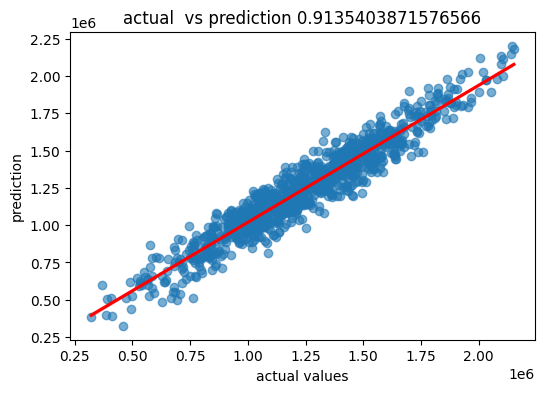

In [156]:
plt.figure(figsize =(6,4))
sns.regplot(x = y_test, y= pred, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel('actual values')
plt.ylabel('prediction')
plt.title(f'actual  vs prediction { r2_square}')
plt.show()